<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/PyTorch_DeepLearning_FullModelTraining_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Model Development Traning ( SOLUTIONING THE PROBLEM : Most important step)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import dataloader
from torch.utils.data import random_split
from torch.utils.data import Subset

from torch import optim
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
#Define neural network , __init__ and forward functions.

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x
"""
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,6, 5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
  """

In [3]:
#Create model class and initiate it
net=Net()
print(net)

#Define loss function and Optimizer
#lr=0.4
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
 #Load and trasnform the data

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(std=(0.5,0.5,0.5),
                                                                    mean=(0.5,0.5,0.5))])

train_trasforms=transforms.Compose([transforms.RandomCrop(32,padding=4),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.4914,0.4822,0.4465),
                                                         std=(0.2023,0.1994,0.2010))])

batch_size=32
train_size=400
val_size=100



train_data=CIFAR10.CIFAR10(root='./data',train=True,download=True,transform=train_trasforms)
test_set=CIFAR10.CIFAR10(root='./data',train=False,download=True,transform=train_trasforms)
#train_set, validation_set=random_split(train_data,[train_size,val_size])

# Create subsets
train_sub_data = Subset(train_data, range(4000))   # First 400 samples
test_validation_sub_set  = Subset(test_set, range(1000))    # First 100 samples

trainloader=torch.utils.data.DataLoader(train_sub_data,batch_size=batch_size,shuffle=True,num_workers=2)

validation_loader=torch.utils.data.DataLoader(test_validation_sub_set,batch_size=batch_size,shuffle=False,num_workers=2)

#Example:Check the length of splits
print("Traning Set Size:",{len(train_sub_data)})
print("Validation Set Size:",{len(test_validation_sub_set)})


testloader=torch.utils.data.DataLoader(test_validation_sub_set,batch_size=batch_size,shuffle=False,num_workers=2)

100%|██████████| 170M/170M [00:01<00:00, 94.9MB/s]


Traning Set Size: {4000}
Validation Set Size: {1000}


In [5]:
#Train the network/Model
epochs=10
for epoch in range(epochs):
  net.train() #set the model to training mode
  running_loss=0.0
  for i,data in enumerate(trainloader,0):

    #get the inputs, data is a triple of [inputs,labels]
    inputs,labels=data

    #zero the parameter gradiant
    optimizer.zero_grad()

    #farward + backward = optimize
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    #Print Statstics
    running_loss+=loss.item()
    net.eval()  #set the model to evaluation mode for validation
    validation_loss=0.0
    correct=0
    total=0
    with torch.no_grad():
        for data in testloader:
          images,labels=data
          outputs=net(images)
          loss=criterion(outputs,labels)
          validation_loss +=loss.item()
          _,predicted=torch.max(outputs.data,1)
          total+=labels.size(0)
          correct += ( predicted==labels).sum().item()
  print(f'epoch: {epoch+1}, training_loss: {running_loss/len(trainloader)}, validation_loss: {validation_loss/len(validation_loader)}, accuracy: {100*correct/total}%')
print('Fininsh Traning')

epoch: 1, training_loss: 2.3039441413879396, validation_loss: 2.3038870841264725, accuracy: 10.0%
epoch: 2, training_loss: 2.2971479835510253, validation_loss: 2.299486316740513, accuracy: 10.0%
epoch: 3, training_loss: 2.284684471130371, validation_loss: 2.289564035832882, accuracy: 13.5%
epoch: 4, training_loss: 2.2587737712860108, validation_loss: 2.2673546597361565, accuracy: 18.5%
epoch: 5, training_loss: 2.2157732791900635, validation_loss: 2.233969233930111, accuracy: 19.3%
epoch: 6, training_loss: 2.186048581123352, validation_loss: 2.2276382073760033, accuracy: 20.5%
epoch: 7, training_loss: 2.145975567817688, validation_loss: 2.2106559202075005, accuracy: 21.1%
epoch: 8, training_loss: 2.0871539125442506, validation_loss: 2.164379984140396, accuracy: 25.1%
epoch: 9, training_loss: 2.0392933406829834, validation_loss: 2.1505805030465126, accuracy: 25.6%
epoch: 10, training_loss: 2.0098517541885377, validation_loss: 2.1186463721096516, accuracy: 26.3%
Fininsh Traning


In [8]:
#Evaluate on Test Data

correct = 0
total = 0
with torch.no_grad():
    # Use a DataLoader for the test subset
    test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=batch_size, shuffle=False, num_workers=2)
    for data in test_subset_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Removed print statements inside the loop to avoid excessive output
        # print(f"Predicted: {predicted}, Actual: {labels}")
        # print(f"Total: {total}, Correct: {correct}")
        # print(f"Accuracy: {100 * correct / total:.2f}%")

print(f"Accuracy on test images: {100 * correct / total:.2f}%")

Accuracy on test images: 26.30%


In [11]:
# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#airplane ✈️
#automobile 🚗
#bird 🐦
#cat 🐱
#deer 🦌
#dog 🐶
#frog 🐸
#horse 🐴
#ship 🚢
#truck 🚚

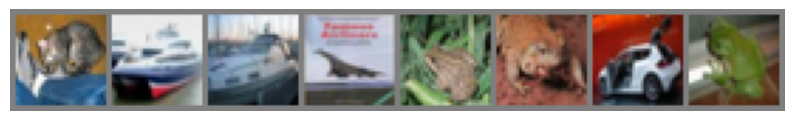

Predicted: deer ship car ship deer frog frog frog
Actual:    cat ship ship plane frog frog car frog


In [13]:
#Visualize Sample Predictions

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get a batch of test images using a DataLoader
test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=8, shuffle=False, num_workers=2)
dataiter = iter(test_subset_loader)
images, labels = next(dataiter)

# Predict
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Show images with predicted and true labels
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))
print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(8)))
print('Actual:   ', ' '.join(f'{classes[labels[j]]}' for j in range(8)))

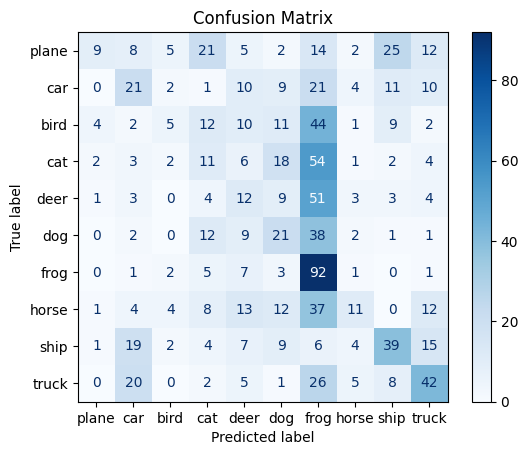

In [15]:
#Plot a Confusion/Heat Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import torch

# Gather all predictions and true labels
all_preds = []
all_labels = []

# Use a DataLoader for the test subset
test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=batch_size, shuffle=False, num_workers=2)

with torch.no_grad():
    for data in test_subset_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()